# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [104]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [105]:
weather_df = pd.DataFrame(range(0,len(cities)))

names = []
lats = []
lngs = []
maxTemps = []
humidity = []
cloudiness = []
windSpeeds = []
countries = []
dates = []
weatherJson = []

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    loc = city.capitalize()
    query_url = f"{url}appid={weather_api_key}&units={units}&q={loc}"
    #query_url = f"{url}appid={weather_api_key}&q={loc}"

    response = requests.get(query_url).json()
    weatherJson.append(response)
    
    try:
        names.append(response["name"])
        lats.append(response['coord']['lat'])
        lngs.append(response["coord"]["lon"])
        maxTemps.append(response["main"]["temp_max"])
        humidity.append(float(response["main"]["humidity"]))
        cloudiness.append(response["clouds"]["all"])
        windSpeeds.append(response["wind"]["speed"])
        countries.append(response["sys"]["country"])
        dates.append(response["dt"])
        x = response["id"]
        print(f"Processing {loc} Number: {x}")
    except:
#         names.append(loc)
#         lats.append("N/A")
#         lngs.append("N/A")
#         maxTemps.append("N/A")
#         humidity.append("N/A")
#         cloudiness.append("N/A")
#         windSpeeds.append("N/A")
#         countries.append("N/A")
#         dates.append("N/A")
        print("City Name Not Found")
    
    
print("Finished")        

Processing Carnarvon Number: 2074865
Processing Nikolskoye Number: 546105
Processing Cayenne Number: 3382160
Processing Plastun Number: 2017912
Processing Atuona Number: 4020109
Processing Jamestown Number: 5122534
Processing Rikitea Number: 4030556
Processing Hermanus Number: 3366880
Processing Vaini Number: 4032243
Processing Pantai remis Number: 1752256
Processing Svetlaya Number: 2015852
Processing Longyearbyen Number: 2729907
City Name Not Found
Processing Mataura Number: 6201424
Processing Avarua Number: 4035715
Processing Tahoua Number: 2439376
Processing Vestmannaeyjar Number: 3412093
Processing Columbus Number: 4509177
Processing Punta arenas Number: 3874787
Processing Kahului Number: 5847411
Processing Lagunas Number: 3695844
Processing Kirakira Number: 2178753
Processing Ushuaia Number: 3833367
Processing Port alfred Number: 964432
Processing Cape town Number: 3369157
City Name Not Found
Processing Iralaya Number: 3608828
Processing Jose de freitas Number: 3397230
Processing

Processing Tiksi Number: 2015306
Processing Mitzic Number: 2398283
Processing Colares Number: 2269142
Processing Chokurdakh Number: 2126123
City Name Not Found
Processing Sackville Number: 6137063
Processing Aswan Number: 359792
Processing Naples Number: 3172394
Processing Codrington Number: 2171099
Processing Havelock Number: 4470244
Processing Sabha Number: 2212775
Processing Cervena voda Number: 3077972
Processing Luderitz Number: 3355672
Processing Taian Number: 1793724
Processing Upington Number: 945945
Processing Patacamaya Number: 3908339
Processing Fortuna Number: 5563839
Processing Batagay Number: 2027044
Processing Leshukonskoye Number: 535839
Processing Nemuro Number: 2128975
Processing Iroquois falls Number: 5984000
Processing Lucapa Number: 145724
Processing Beipiao Number: 2038342
Processing Kysyl-syr Number: 2021017
Processing Hobyo Number: 57000
Processing Big spring Number: 5517061
Processing Lebu Number: 3883457
Processing Flinders Number: 6255012
Processing Kalmunai 

Processing Airai Number: 1651810
Processing Bhag Number: 1182872
Processing Sandwick Number: 2638534
Processing Sandviken Number: 2680075
Processing Koran Number: 3206012
Processing Abu samrah Number: 172515
Processing Mujiayingzi Number: 2035707
Processing San andres Number: 3670218
Processing Santa cruz Number: 3904906
City Name Not Found
Processing Saint-joseph Number: 6690296
Processing Beringovskiy Number: 2126710
Processing Charters towers Number: 2171722
Processing Husavik Number: 2629833
Processing Awbari Number: 2219235
Processing Lauria Number: 3175034
Processing Arroyo Number: 3129371
Processing Yurino Number: 466423
Processing Longavi Number: 3882559
Processing Katobu Number: 1640972
Processing Salinopolis Number: 3389822
Processing Livermore Number: 5367440
Processing Clyde river Number: 5924351
Processing Odweyne Number: 53372
Processing Capreol Number: 5959803
Processing Puerto quijarro Number: 3444201
Processing Nijar Number: 2513222
Processing Mouila Number: 2398073
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [106]:
weather_dict = {
    "City": names,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": maxTemps,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": windSpeeds,
    "Country": countries,
    "Date": dates
}
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv("output_data/cities.csv", index=False, header=True)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.8667,113.6333,64.47,94.0,40,8.05,AU,1650921858
1,Nikolskoye,59.7035,30.7861,42.87,97.0,100,5.06,RU,1650921995
2,Cayenne,4.9333,-52.3333,80.10,1.0,0,0.00,GF,1650922135
3,Plastun,44.7561,136.2939,39.31,88.0,4,10.71,RU,1650922135
4,Atuona,-9.8000,-139.0333,78.28,79.0,24,16.06,PF,1650921999
...,...,...,...,...,...,...,...,...,...
565,Tuzha,57.6062,47.9360,47.88,93.0,90,9.55,RU,1650922378
566,Nhulunbuy,-12.2333,136.7667,75.81,94.0,31,0.00,AU,1650922378
567,Prince Albert,53.2001,-105.7677,35.55,51.0,0,14.97,CA,1650922207
568,Bajos de Haina,18.4154,-70.0332,82.33,73.0,75,5.75,DO,1650922379


In [107]:
summary_df = pd.DataFrame()
    
q25 = weather_df.quantile(.25)
q50 = weather_df.quantile(.5)
q75 = weather_df.quantile(.75)
    
    
summary_df = weather_df.agg(["count","mean","std","min","max"])  
finalSummary_df = summary_df[["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]]
finalSummary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
min,-54.800000,-175.200000,-6.090000,1.000000,0.000000,0.000000,1.650922e+09
max,78.218600,179.316700,98.290000,100.000000,100.000000,31.720000,1.650922e+09
mean,20.826703,17.816249,60.829298,71.847368,60.312281,7.863860,1.650922e+09
std,32.834459,87.889653,20.519151,22.252652,38.960130,5.502976,1.265299e+02


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [108]:
#  Get the indices of cities that have humidity over 100%.
highHumidity = weather_df.loc[weather_df["Humidity"] > 100]
highHumidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [109]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_df.loc[weather_df["Humidity"] <= 100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.8667,113.6333,64.47,94.0,40,8.05,AU,1650921858
1,Nikolskoye,59.7035,30.7861,42.87,97.0,100,5.06,RU,1650921995
2,Cayenne,4.9333,-52.3333,80.10,1.0,0,0.00,GF,1650922135
3,Plastun,44.7561,136.2939,39.31,88.0,4,10.71,RU,1650922135
4,Atuona,-9.8000,-139.0333,78.28,79.0,24,16.06,PF,1650921999
...,...,...,...,...,...,...,...,...,...
565,Tuzha,57.6062,47.9360,47.88,93.0,90,9.55,RU,1650922378
566,Nhulunbuy,-12.2333,136.7667,75.81,94.0,31,0.00,AU,1650922378
567,Prince Albert,53.2001,-105.7677,35.55,51.0,0,14.97,CA,1650922207
568,Bajos de Haina,18.4154,-70.0332,82.33,73.0,75,5.75,DO,1650922379


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

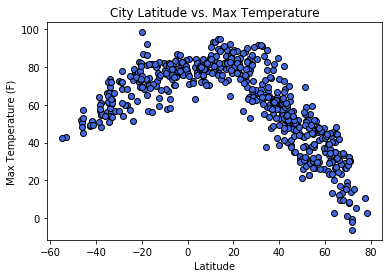

In [110]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"],color = "royalblue",edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")
plt.savefig("output_data/fig1.png")
plt.show()

#Here we see how the Max Temperature changes based on the latitude. We can see that the 
#closer the latitude is to 0, the higher the max temperature tends to be.

## Latitude vs. Humidity Plot

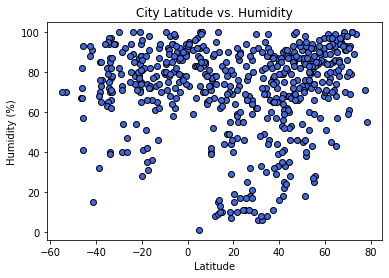

In [111]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],color = "royalblue",edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.savefig("output_data/fig2.png")
plt.show()

#Here we see the relationship between Latitude and Humidity. There seems to be no solid relationship 
#between the two but possibly a weak relation with humidity getting lower the closer latitude is to 0. 
#Seems like most Humidty percentages are above 60%.

## Latitude vs. Cloudiness Plot

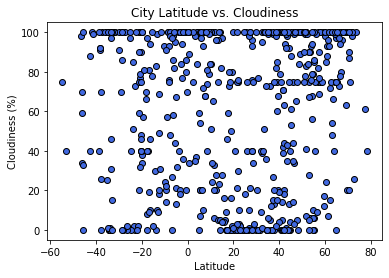

In [112]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"],color = "royalblue",edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.savefig("output_data/fig3.png")
plt.show()

#Here we see the relationship between Latitude and Cloudiness. There seems to be no solid relationship 
#between the two. Seems like the most common Cloudiness percenages are 0 and 100.

## Latitude vs. Wind Speed Plot

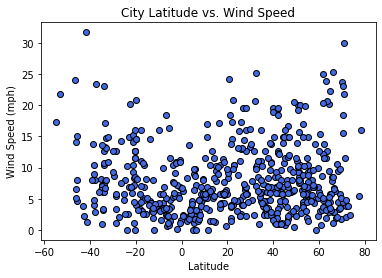

In [113]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],color = "royalblue",edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.savefig("output_data/fig4.png")
plt.show()

#Here we see the relationship between Latitude and Wind Speed. There seems to be no solid relationship 
#between the two but possibly weak relation with Wind Speed getting higher the further Latitude is from 0.

## Linear Regression

In [114]:
nh_df = clean_city_data.loc[clean_city_data["Lat"] >= 0]
sh_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.876819683128218


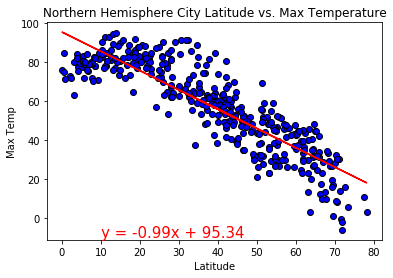

In [115]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_df["Lat"],nh_df["Max Temp"])
regressValues = nh_df["Lat"] * slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nh_df["Lat"],nh_df["Max Temp"],color = "blue",edgecolor = "black")
plt.plot(nh_df["Lat"],regressValues,"r-")
plt.annotate(lineEq,(10,-10),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7534142143392561


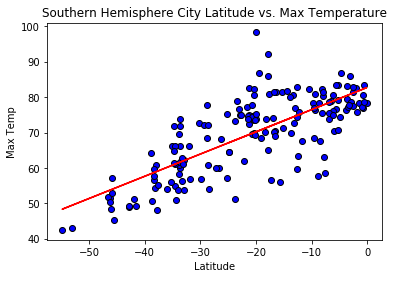

In [117]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_df["Lat"],sh_df["Max Temp"])
regressValues = sh_df["Lat"] * slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sh_df["Lat"],sh_df["Max Temp"],color = "blue",edgecolor = "black")
plt.plot(sh_df["Lat"],regressValues,"r-")
plt.annotate(lineEq,(-50,25),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

#Fairly strong relation between Max Temperature and Latitude with both hemispheres having a r-value over 0.7.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.23035017318018117


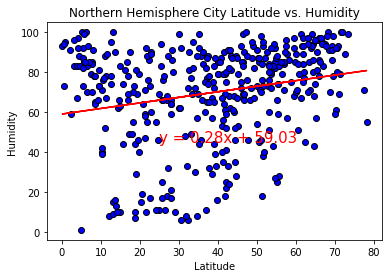

In [118]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_df["Lat"],nh_df["Humidity"])
regressValues = nh_df["Lat"] * slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nh_df["Lat"],nh_df["Humidity"],color = "blue",edgecolor = "black")
plt.plot(nh_df["Lat"],regressValues,"r-")
plt.annotate(lineEq,(25,45),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.20309480875992164


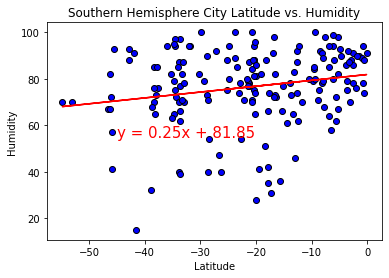

In [119]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_df["Lat"],sh_df["Humidity"])
regressValues = sh_df["Lat"] * slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sh_df["Lat"],sh_df["Humidity"],color = "blue",edgecolor = "black")
plt.plot(sh_df["Lat"],regressValues,"r-")
plt.annotate(lineEq,(-45,55),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

#Seems to have no strong relationship between Latitude and Humidity with both R-Values under 0.25.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.24980324676877422


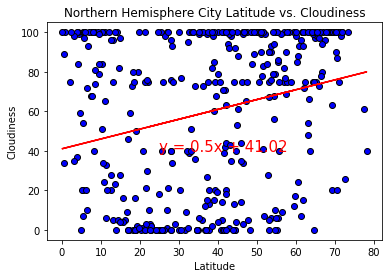

In [120]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_df["Lat"],nh_df["Cloudiness"])
regressValues = nh_df["Lat"] * slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nh_df["Lat"],nh_df["Cloudiness"],color = "blue",edgecolor = "black")
plt.plot(nh_df["Lat"],regressValues,"r-")
plt.annotate(lineEq,(25,40),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03830276455436497


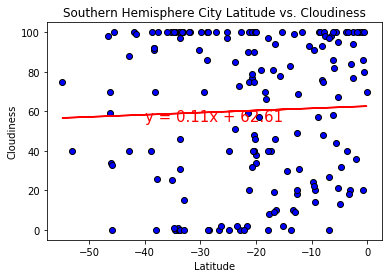

In [121]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_df["Lat"],sh_df["Cloudiness"])
regressValues = sh_df["Lat"] * slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sh_df["Lat"],sh_df["Cloudiness"],color = "blue",edgecolor = "black")
plt.plot(sh_df["Lat"],regressValues,"r-")
plt.annotate(lineEq,(-40,55),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

#Seems to have no strong relationship between Latitude and Cloudiness with both R-Values under 0.25.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.15687369688513736


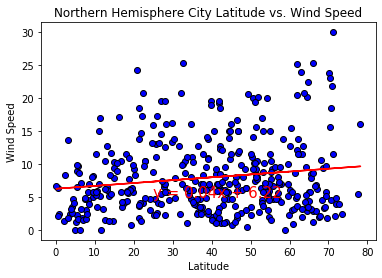

In [122]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_df["Lat"],nh_df["Wind Speed"])
regressValues = nh_df["Lat"] * slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nh_df["Lat"],nh_df["Wind Speed"],color = "blue",edgecolor = "black")
plt.plot(nh_df["Lat"],regressValues,"r-")
plt.annotate(lineEq,(25,5),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3345010072769686


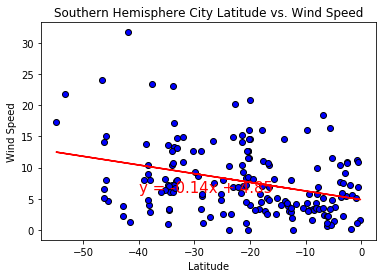

In [123]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_df["Lat"],sh_df["Wind Speed"])
regressValues = sh_df["Lat"] * slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sh_df["Lat"],sh_df["Wind Speed"],color = "blue",edgecolor = "black")
plt.plot(sh_df["Lat"],regressValues,"r-")
plt.annotate(lineEq,(-40,6),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

#Seems to have no strong relationship between Latitude and Wind Speed with both R-Values under 0.35.